In [2]:
!pip install "preliz[full,notebook]"

In [3]:
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
url = "https://raw.githubusercontent.com/aahFancyGun/dataScienceClass/master/unit3/Real_Estate_Sales_2001-2022_GL.csv"

housing_data = pd.read_csv(url)

housing_data

,Unnamed: 0,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,641887,90462,2009,03/12/2010,New Haven,140 FARREN AV,128240.0,17500.0,7.328000,Single Family,Single Family,13 - Bankrupcy,NaN,NaN,NaN
1,895979,150210,2015,04/28/2016,Simsbury,6 STRATTON FOREST WAY,170870.0,239900.0,0.712255,Condo,Condo,25 - Other,PUD ESTATE SALE,NaN,NaN
2,111372,210431,2021,12/15/2021,Norwalk,11 COSSITT RD,290990.0,580000.0,0.501700,Residential,Single Family,NaN,5-74-76-0,NaN,POINT (-73.438337032 41.098735012)
3,340935,30111,2003,06/03/2004,Thomaston,331 ATWOOD RD,98030.0,248000.0,0.395282,NaN,NaN,NaN,NaN,NaN,NaN
4,621526,90158,2009,11/05/2009,Bridgeport,2612 NORTH AVENUE UB4,135210.0,170500.0,0.793021,Condo,Condo,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,545940,61636,2006,08/31/2007,Norwalk,8 HORTON ST,183820.0,350000.0,0.525200,Single Family,Single Family,NaN,NaN,NaN,NaN
99996,798309,140602,2014,06/02/2015,Danbury,46 JEFFERSON AVE,117800.0,175197.0,0.672386,Single Family,Single Family,NaN,H16134,NaN,NaN
99997,541685,70751,2007,02/27/2008,Bridgeport,33 BOSTON TERR. #17,42211.0,234000.0,0.180389,Condo,Condo,NaN,NaN,NaN,NaN
99998,854663,15099,2015,12/21/2015,Farmington,21 TAINE MT RD,259170.0,382000.0,0.678455,Single Family,Single Family,NaN,NaN,NaN,POINT (-72.90129 41.75818)


In [5]:
housing_data_2022 = housing_data.query('`List Year` == 2022')

housing_data_2022 = housing_data_2022.query('`Sales Ratio` < 2')

housing_data_2022

,Unnamed: 0,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
8,155974,220240,2022,09/05/2023,Rocky Hill,279 WESTERLY TERRACE,189980.0,386000.0,0.4921,Residential,Single Family,NaN,NaN,NaN,POINT (-72.684539991 41.665812)
81,164944,2201141,2022,06/26/2023,Stamford,149 FISHING TRAIL,460855.0,735000.0,0.6270,Residential,Single Family,14 - Foreclosure,NaN,NaN,POINT (-73.562721039 41.147776982)
107,3497,22126,2022,05/01/2023,Monroe,3 SPINNING WHEEL ROAD,251500.0,560000.0,0.4491,Residential,Single Family,NaN,NaN,NaN,POINT (-73.18970204 41.335190009)
114,3977,22012,2022,10/11/2022,Monroe,136 FAR HORIZON DRIVE,239300.0,471000.0,0.5080,Residential,Single Family,NaN,NaN,NaN,POINT (-73.223589991 41.32780002)
125,143728,220763,2022,07/19/2023,Greenwich,CAMBRIDGE DRIVE 0026,513450.0,1200000.0,0.4278,Residential,Single Family,25 - Other,ESTATE SALE,NaN,POINT (-73.668034036 41.029867996)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99884,159700,220242,2022,03/03/2023,Shelton,27 STEPHENS TERRACE,84210.0,135000.0,0.6237,Residential,Condo,NaN,105 81 27,NaN,POINT (-73.171079372 41.35410452)
99901,157575,220218,2022,07/31/2023,Windsor Locks,24 DEXTER RD,100520.0,231500.0,0.4342,Residential,Single Family,NaN,NaN,NaN,POINT (-72.62884501 41.920474)
99902,151350,220121,2022,07/17/2023,Portland,63 MOUNTAIN LAUREL WAY,112560.0,615000.0,0.1830,Residential,Single Family,07 - Change in Property,111-0014-17,NEW CONSTRUCTION,POINT (-72.590007965 41.626424013)
99903,163927,220485,2022,09/08/2023,Trumbull,142 BEARDSLEY PARKWAY,292670.0,616000.0,0.4751,Residential,Single Family,NaN,NaN,NaN,POINT (-73.175325987 41.224764009)


In [6]:
indiv_housing = housing_data_2022[["Sales Ratio"]].copy()

indiv_housing



,Sales Ratio
8,0.4921
81,0.6270
107,0.4491
114,0.5080
125,0.4278
...,...
99884,0.6237
99901,0.4342
99902,0.1830
99903,0.4751


(array([ 103.,  616., 2276.,  611.,  174.,   86.,   26.,   15.,   14.,
           8.]),
 array([0.     , 0.19902, 0.39804, 0.59706, 0.79608, 0.9951 , 1.19412,
        1.39314, 1.59216, 1.79118, 1.9902 ]),
 <BarContainer object of 10 artists>)

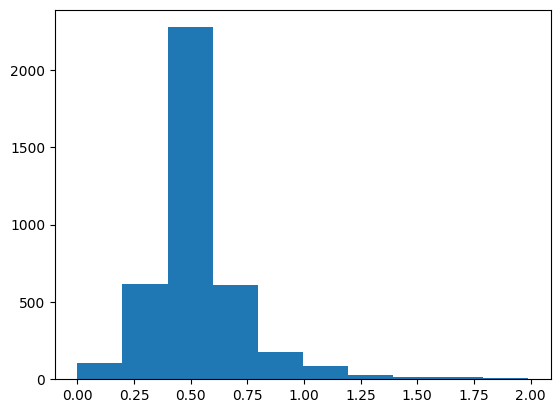

In [7]:
plt.hist(indiv_housing)

In [11]:
indiv_housing.max(0)

Sales Ratio    1.9902
dtype: float64

In [51]:
most_frequent = indiv_housing['Sales Ratio'].value_counts()

most_frequent

print(np.any(indiv_housing == 0))  # Check for any zeros in the observed data
indiv_housing = indiv_housing[indiv_housing != 0]
print(np.any(indiv_housing < 0))


True
False


In [171]:
with pm.Model() as housing_ft_model:

    # Define the priors with better lower bound for Uniform and valid range
    uniform_prior = pm.Uniform('Uniform', lower=9, upper=20)  # Changed lower bound from 0.001 to 0.1
    
    gamma_prior = pm.Gamma('Gamma', alpha=13, beta=14, mu = 0.01, sigma = 1)
    
    # Defining the likelihood using InverseGamma
    y = pm.InverseGamma('y', alpha=gamma_prior, beta=uniform_prior, observed=indiv_housing)

    housing_ft_model.debug()
    
    idata_housing = pm.sample(100) 

c:\Users\aahfa\AppData\Local\Programs\Python\Python311\Lib\site-packages\pymc\model\core.py:1366: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


point={'Uniform_interval__': array(0.), 'Gamma_log__': array(-0.07410794), 'y_unobserved_log__': array([2.0173691, 2.0173691, 2.0173691, 2.0173691, 2.0173691, 2.0173691,
       2.0173691, 2.0173691, 2.0173691, 2.0173691, 2.0173691, 2.0173691])}

No problems found


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Uniform, Gamma, y_unobserved]


Output()

Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 30 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


array([<Axes: title={'center': 'Gamma'}>,
       <Axes: title={'center': 'Uniform'}>], dtype=object)

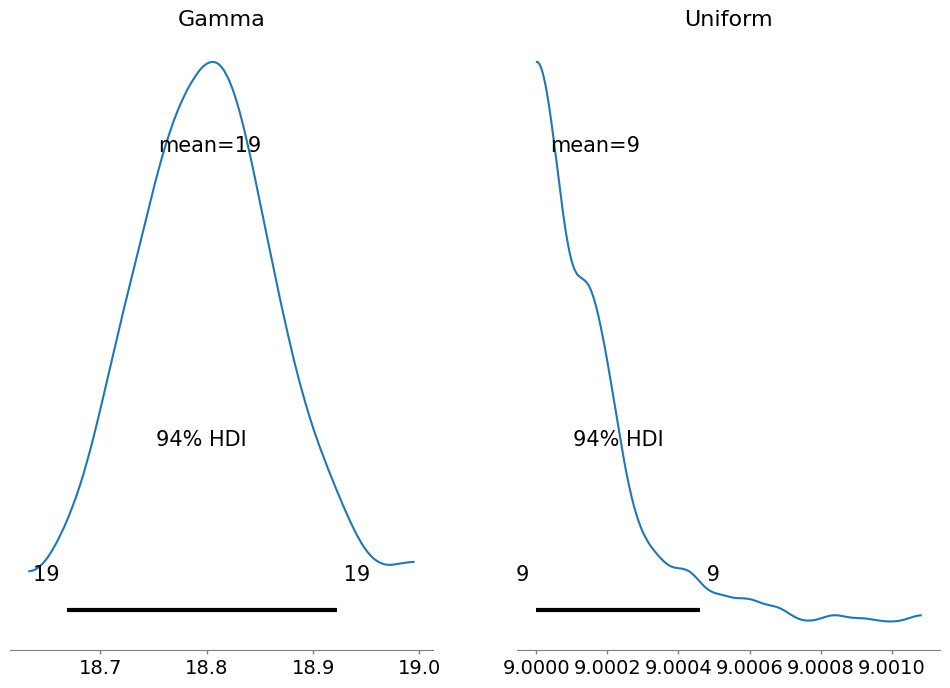

In [172]:
az.plot_posterior(idata_housing, figsize=(12, 8), var_names=["Gamma", "Uniform"])


In [173]:
pm.sample_posterior_predictive(idata_housing, model=housing_ft_model, extend_inferencedata=True)

Sampling: [y_observed]


Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(0.0, 2.0)

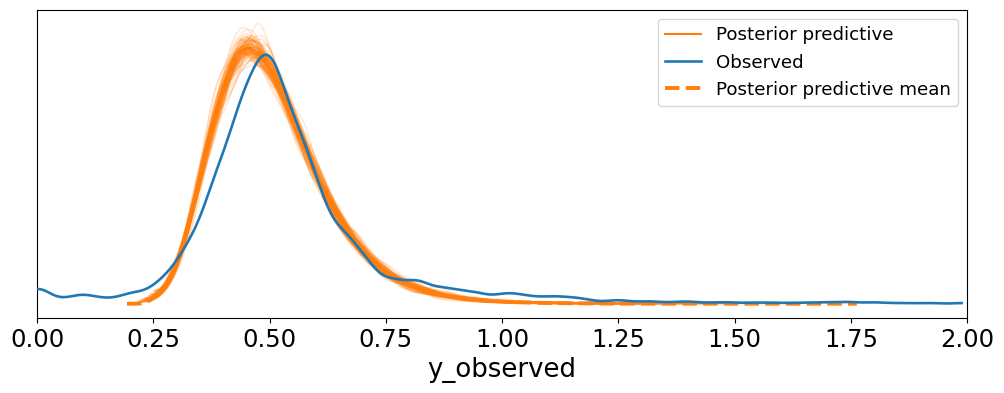

In [174]:
az.plot_ppc(idata_housing, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
plt.xlim(0, 2)